## Cleaning and Analyzing Employee Exit Surveys

In this project, we will be working with employee exit surveys from the Department of Education, Training, and Employment and the Technical and Further Education institute in Queensland, Australia.

By analyzing these datasets, we hope to answer the following question:
1. Are employees who only worked for the institutes for a short period of time resigning due to dissatisfaction? What about employees who have been there longer?

Let's start by importing the libraries we will be using and exploring the data.

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100 # to avoid truncated output

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Here are some of our initial observations:
1. In the DETE survey, missing values are represented as both 'NaN' and 'Not Stated'.
2. Both survey contain numerous columns that aren't necessary for our analysis.  Fortunately, many of the missing values can be found in these columns.
3. Both surveys have repetitious columns with different names.

## Handling Missing Values and Removing Columns

Let's read in the DETE survey again, but this time, we'll fill in all of the 'Not Stated' values with 'NaN'.  Let's also drop columns we won't be using in our analysis to make the datasets more manageable.

In [4]:
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')
dete_survey_slim = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_slim = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [5]:
# Check that columns were dropped correctly
print(dete_survey_slim.columns)
print(tafe_survey_slim.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

## Standardizing Column Names

Let's standardize the column names in each dataset so we can later combine them.

In [6]:
dete_survey_slim.columns = dete_survey_slim.columns.str.lower().str.replace(' ', '_').str.strip()
standardized_columns = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 
                        'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
                        'Employment Type. Employment Type': 'employment_status','Classification. Classification': 'position', 
                        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_slim = tafe_survey_slim.rename(standardized_columns, axis = 1)

In [7]:
# Check that columns were renamed correctly
print(dete_survey_slim.columns)
print(tafe_survey_slim.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

## Filtering Data

Now that we've cleaned up the data, let's start drilling into the columns that will help us answer our questions.  We'll start by figuring out the different reasons employees terminated their employment.

In [8]:
print(dete_survey_slim['separationtype'].value_counts())
print(tafe_survey_slim['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [9]:
# Update DETE separation types to only include one resignation category
dete_survey_slim['separationtype'] = dete_survey_slim['separationtype'].str.split('-').str[0]
dete_survey_slim['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [10]:
dete_resign = dete_survey_slim[dete_survey_slim['separationtype'] == 'Resignation']
tafe_resign = tafe_survey_slim[tafe_survey_slim['separationtype'] == 'Resignation']

## Verifying Data

Before continuing, we should make sure the rest of our dataset has values that look reasonable.

Since the cease date is the final year of a person's employment and the start date is the person's first year of employment, neither column should have years after the current date.  

Given the age range of the current working population, we should also be cautious of start dates earlier than ~1940.

In [11]:
# Check DETE resignation dates
dete_resign['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
2010         1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [12]:
# Create column that only has year of resignation
pattern = r'([1-2][0-9]{3})'
dete_resign['cease_year'] = dete_resign['cease_date'].str.extract(pattern)
dete_resign['cease_year'] = dete_resign['cease_year'].astype(float)
dete_resign['cease_year'].value_counts()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

In [13]:
# Check DETE start dates
dete_resign['dete_start_date'].value_counts().sort_values()

1963.0     1
1971.0     1
1972.0     1
1984.0     1
1977.0     1
1987.0     1
1975.0     1
1973.0     1
1982.0     1
1974.0     2
1983.0     2
1976.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1993.0     5
1990.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2009.0    13
2006.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [14]:
# Check TAFE resignation dates
tafe_resign['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

All of the date values appear to be reasonable, so we'll leave these columns as is.

## Creating a New Column

The TAFE dataset already has a column that indicates the number of years an employee worked at the institute; however, we'll need to create a similar column in the DETE dataset.

In [15]:
dete_resign['institute_service'] = dete_resign['cease_year'] - dete_resign['dete_start_date']
dete_resign['institute_service'].head()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64

## Identifying Dissatisfied Employees

We will continue to refine our analysis by determining which employees resigned because they were dissatisfied with their job.

In [16]:
print(tafe_resign['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resign['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [17]:
# Update values in TAFE Contributing Factors columns to True, False, or NaN to indicate job dissatisfaction
def update_vals(col):
    if pd.isnull(col):
        return np.nan
    elif col == '-':
        return False
    else:
        return True

tafe_resign['dissatisfied'] = (tafe_resign[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
               .applymap(update_vals)
               .any(axis = 1, skipna = False)
              )
tafe_resign['dissatisfied'].value_counts(dropna = False)

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [18]:
# Update values in DETE factor columns to True, False, or NaN to indicate job dissatisfaction
dete_factors = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 
                'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 
                'work_life_balance', 'workload']
dete_resign['dissatisfied'] = dete_resign[dete_factors].any(axis = 1, skipna = False)
dete_resign['dissatisfied'].value_counts(dropna = False)

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


False    162
True     149
Name: dissatisfied, dtype: int64

## Combining Data

Now that our two datasets have been cleaned up, we can combine the two to simplify later analysis.

In [19]:
# Add new columns to indicate which dataframe each row came from
dete_resign['institute'] = 'DETE'
tafe_resign['institute'] = 'TAFE'
combined = pd.concat([dete_resign, tafe_resign], ignore_index = True)
combined.notnull().sum()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass

Contributing Factors. Career Move - Private Sector     332
Contributing Factors. Career Move - Public Sector      332
Contributing Factors. Career Move - Self-employment    332
Contributing Factors. Dissatisfaction                  332
Contributing Factors. Ill Health                       332
Contributing Factors. Interpersonal Conflict           332
Contributing Factors. Job Dissatisfaction              332
Contributing Factors. Maternity/Family                 332
Contributing Factors. NONE                             332
Contributing Factors. Other                            332
Contributing Factors. Study                            332
Contributing Factors. Travel                           332
Institute                                              340
WorkArea                                               340
aboriginal                                               7
age                                                    596
business_unit                                           

In [20]:
# Drop remaining columns that we do not need to complete analysis
combined_updated = combined.dropna(thresh = 500, axis = 1)

## Cleaning the Service Column

Next, we will clean the years of service column by categorizing employees according to the following buckets:

New: Less than 3 years in the workplace  
Experienced: 3-6 years in the workplace  
Established: 7-10 years in the workplace  
Veteran: 11+ years in the workplace  

This bucketing system is based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) , which argues that employee needs are better understood according to career stage rather than age.  

In [21]:
# Check unique values
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [22]:
# Extract years of service
pattern = r'(\d+)'
combined_updated['institute_service_up'] = (combined_updated['institute_service']
                                            .astype('str')
                                            .str.extract(pattern)
                                           )
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [23]:
# Map each value to a career stage defined above
def career_stage(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6 :
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    else:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(career_stage)
combined_updated['service_cat'].value_counts()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Initial Analysis

Finally, we'll replace the missing values in the dissatisfied column with the most frequent value. we will then calculate the percentage of employees who resigned due to dissatisfaction in each career stage group and plot the results.

Since there missing values we still haven't dealt with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [24]:
# Confirm value counts
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [25]:
# Fill missing values with the most common value, which is false
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

C:\Users\nluth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    411
True     240
Name: dissatisfied, dtype: int64

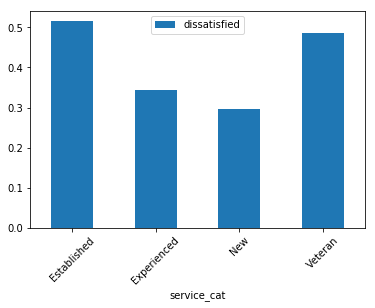

In [26]:
# Calculate the percentage of employees who resigned in each career stage category
combined_updated_pv = combined_updated.pivot_table(index = 'service_cat', values = 'dissatisfied')

%matplotlib inline
combined_updated_pv.plot(kind = 'bar', rot = 45)

## Conclusion

By analyzing these datasets, we offer the following answer to our initial question:
* Are employees who only worked for the institutes for a short period of time resigning due to dissatisfaction? What about employees who have been there longer?
  - Newer employees tend to resign less due to job dissatisaction, while employees with more experience tend to resign due to dissatisaction more often.